In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.model_selection import train_test_split
import pandas, xgboost, numpy, textblob, string
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from tqdm._tqdm_notebook import tqdm_notebook
import pandas as pd
tqdm_notebook.pandas()
from sklearn.decomposition import TruncatedSVD
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
stopWords = set(stopwords.words('english'))

C:\Users\Sabir Ismail\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import re
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "i'd": "i would",
  "i'd've": "i would have",
  "i'll": "i will",
  "i'll've": "i will have",
  "i'm": "i am",
  "i've": "i have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

print(expandContractions("you're just awsome"))

you are just awsome


In [3]:
file_path = '../Custom List/stop_word_extended.txt'

with open(file_path, encoding='latin-1') as f:
    lines = f.readlines()
print(len(lines))

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_word_list = []

for line in lines:
    stop_word_list.append(line.replace('\n',''))
    
stop_words.extend(stop_word_list)

326


In [4]:
df = pd.read_csv('./Data/sync_sw_name_jaws.csv')
df = df.drop('Tag2', 1)

In [5]:
df['Original_post'] = df.Post

In [6]:
print(len(df))
df.head()

21845


,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,Junk,Original_post
0,1,": a history of jaws and windows, was: training...",": a history of jaws and windows, was: training...",original,original,undefined,undefined,undefined,Clarification,undefined,undefined,": a history of jaws and windows, was: training..."
1,2,?luck with kindle?,?luck with kindle? has anyone had any luck usi...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? has anyone had any luck usi...
2,3,?luck with kindle?,?luck with kindle? anyone have any luck using ...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? anyone have any luck using ...
3,4,?luck with kindle?,no i never had any success with the ap for pc!...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,no i never had any success with the ap for pc!...
4,5,?luck with kindle?,yes you have to download the kindle for pc wit...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,yes you have to download the kindle for pc wit...


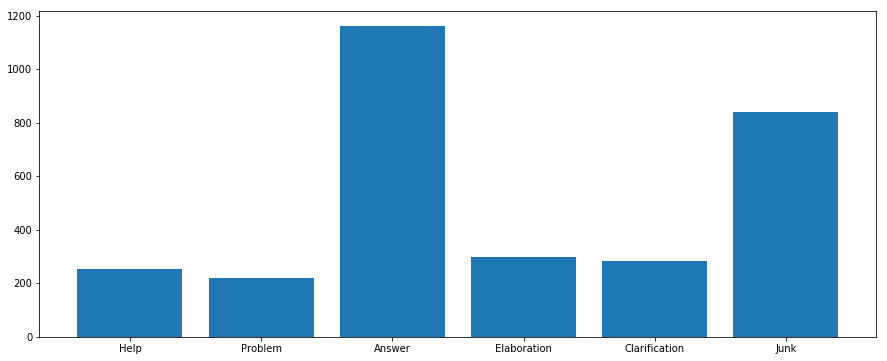

In [7]:
from matplotlib import pyplot as plt

hist={}

for c in ["Help","Problem","Answer","Elaboration","Clarification","Junk"]:
    s=(df[c][df[c]==c].count())
    hist[c]=s

plt.figure(figsize=(15,6)) 
plt.bar(list(hist.keys()), hist.values())
plt.show()

In [8]:
df['count_post'] = df.groupby('Title')['Title'].transform('count')

In [9]:
df.head()

,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,Junk,Original_post,count_post
0,1,": a history of jaws and windows, was: training...",": a history of jaws and windows, was: training...",original,original,undefined,undefined,undefined,Clarification,undefined,undefined,": a history of jaws and windows, was: training...",1
1,2,?luck with kindle?,?luck with kindle? has anyone had any luck usi...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? has anyone had any luck usi...,13
2,3,?luck with kindle?,?luck with kindle? anyone have any luck using ...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? anyone have any luck using ...,13
3,4,?luck with kindle?,no i never had any success with the ap for pc!...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,no i never had any success with the ap for pc!...,13
4,5,?luck with kindle?,yes you have to download the kindle for pc wit...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,yes you have to download the kindle for pc wit...,13


In [10]:
pos = 0
title_prev = None

def assign_position(row):
    global title_prev
    global pos
    
    total = row[12]
    title = str(row[1])
    if title != title_prev:
        pos = 1
        title_prev = title
    else:
        pos += 1
    
    #print(total, title)
    return int(pos/total*10)

In [11]:
df['Position'] = df.apply(assign_position, axis=1)
print(len(df))

21845


In [12]:
df.head()

,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,Junk,Original_post,count_post,Position
0,1,": a history of jaws and windows, was: training...",": a history of jaws and windows, was: training...",original,original,undefined,undefined,undefined,Clarification,undefined,undefined,": a history of jaws and windows, was: training...",1,10
1,2,?luck with kindle?,?luck with kindle? has anyone had any luck usi...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? has anyone had any luck usi...,13,0
2,3,?luck with kindle?,?luck with kindle? anyone have any luck using ...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? anyone have any luck using ...,13,1
3,4,?luck with kindle?,no i never had any success with the ap for pc!...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,no i never had any success with the ap for pc!...,13,2
4,5,?luck with kindle?,yes you have to download the kindle for pc wit...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,yes you have to download the kindle for pc wit...,13,3


In [13]:
prev_tag = "None"

def assign_previous_tag(row):
    
    global prev_tag
    tags = row[5:11]
    
    if row[3] == 'original':
        new_tag = 'None'
    else:
        new_tag = prev_tag
    
    for tag in tags:
        if tag != 'undefined':
            prev_tag = tag
            break
    
    return new_tag 

In [14]:
df['Last_Tag'] = df.progress_apply(assign_previous_tag, axis=1)
print(len(df))

HBox(children=(IntProgress(value=0, max=21845), HTML(value='')))


21845


In [15]:
df.head()

,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,Junk,Original_post,count_post,Position,Last_Tag
0,1,": a history of jaws and windows, was: training...",": a history of jaws and windows, was: training...",original,original,undefined,undefined,undefined,Clarification,undefined,undefined,": a history of jaws and windows, was: training...",1,10,None
1,2,?luck with kindle?,?luck with kindle? has anyone had any luck usi...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? has anyone had any luck usi...,13,0,None
2,3,?luck with kindle?,?luck with kindle? anyone have any luck using ...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? anyone have any luck using ...,13,1,None
3,4,?luck with kindle?,no i never had any success with the ap for pc!...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,no i never had any success with the ap for pc!...,13,2,Junk
4,5,?luck with kindle?,yes you have to download the kindle for pc wit...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,yes you have to download the kindle for pc wit...,13,3,Junk


In [16]:
df['Last_Tag'] = df['Last_Tag'].fillna("NA")

In [17]:
df.head()

,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,Junk,Original_post,count_post,Position,Last_Tag
0,1,": a history of jaws and windows, was: training...",": a history of jaws and windows, was: training...",original,original,undefined,undefined,undefined,Clarification,undefined,undefined,": a history of jaws and windows, was: training...",1,10,None
1,2,?luck with kindle?,?luck with kindle? has anyone had any luck usi...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? has anyone had any luck usi...,13,0,None
2,3,?luck with kindle?,?luck with kindle? anyone have any luck using ...,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? anyone have any luck using ...,13,1,None
3,4,?luck with kindle?,no i never had any success with the ap for pc!...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,no i never had any success with the ap for pc!...,13,2,Junk
4,5,?luck with kindle?,yes you have to download the kindle for pc wit...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,yes you have to download the kindle for pc wit...,13,3,Junk


In [18]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    ## Stemming
    #text = text.split()
    #stemmer = SnowballStemmer('english')
    #stemmed_words = [stemmer.stem(word) for word in text]
    #text = " ".join(stemmed_words)
    
    return text

In [19]:
df['Post'] = df['Post'].astype(str)
df['Post'] = df['Post'].map(lambda x: clean_text(x))

In [20]:
print(len(df))
df.head()

21845


,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,Junk,Original_post,count_post,Position,Last_Tag
0,1,": a history of jaws and windows, was: training...",history jaws windows was : training modules ...,original,original,undefined,undefined,undefined,Clarification,undefined,undefined,": a history of jaws and windows, was: training...",1,10,None
1,2,?luck with kindle?,luck kindle anyone luck using kindle amazon,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? has anyone had any luck usi...,13,0,None
2,3,?luck with kindle?,luck kindle anyone luck using kindle amazon,original,tagged,undefined,undefined,undefined,undefined,undefined,Junk,?luck with kindle? anyone have any luck using ...,13,1,None
3,4,?luck with kindle?,never success pc ! things going application ...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,no i never had any success with the ap for pc!...,13,2,Junk
4,5,?luck with kindle?,yes download kindle accessibillidey plug probl...,following,tagged,undefined,undefined,undefined,undefined,undefined,Junk,yes you have to download the kindle for pc wit...,13,3,Junk


In [21]:
df["Post"] = df["Post"].str.lower()
df["Post"] = df["Post"].astype(str)
df["Post"] = df["Post"].progress_apply(lambda x: [expandContractions(item) for item in x.split()])
df["Post"] = df["Post"].apply(' '.join)

df["Post"] = df["Post"].str.replace('[^\w\s]',' ')
df['Post'] = df['Post'].progress_apply(lambda x: [item for item in x.split()])
df["Post"] = df["Post"].apply(' '.join)

HBox(children=(IntProgress(value=0, max=21845), HTML(value='')))

HBox(children=(IntProgress(value=0, max=21845), HTML(value='')))

In [22]:
def count_help(row):
    count = 0
    
    KEY = ['help','question','questions', 'problem','problems','bug', 'crush', 'not working', 'did not']
    for h in KEY:
        count = count + row.count(h)
            
    return count

In [23]:
df['count_help'] = df.Post.apply(count_help)

In [24]:
def count_wh(row):
    count = 0
    
    KEY = ['what','how','when', 'why','which']
    for h in KEY:
        count = count + row.count(h)
            
    return count

In [25]:
df['count_wh'] = df.Post.apply(count_wh)

In [26]:
def count_other(row):
    count = 0
    
    KEY = ['announcement','announcements','release', 'nvdacon','introducing']
    for h in KEY:
        count = count + row.count(h)
            
    return count

In [27]:
df['count_other'] = df.Post.apply(count_other)

In [28]:
import textblob

pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' :  ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

In [29]:
POS_TAG = ['NN','NNS','NNP','NNPS','PRP','PRP$','WP','WP$',\
           'VB','VBD','VBG','VBN','VBP','VBZ','JJ','JJR','JJS','RB','RBR','RBS','WRB']

In [30]:
def pos_tag_count(x, tag):
    cnt = 0
    wiki = textblob.TextBlob(x)
    for tup in wiki.tags:
        ppo = list(tup)[1]
        if ppo==tag:
            cnt += 1
    return cnt

In [31]:
#creating a function to encapsulate preprocessing, to mkae it easy to replicate on  submission data
def processing(df):
    #lowering and removing punctuation
    df['Post'] = df['Post'].apply(lambda x: re.sub(r'[^\w\s]','', x.lower()))
    
    #numerical feature engineering
    #total length of sentence
    #get number of words
    #df['words'] = df['Post'].apply(lambda x: len(x.split(' ')))
    #get the average word length
    #df['avg_word_length'] = df['Post'].apply(lambda x: np.mean([len(t) for t in x.split(' ') if t not in stopWords]) if len([len(t) for t in x.split(' ') if t not in stopWords]) > 0 else 0)
    #get the average word length
    
    df['length'] = df['Post'].apply(lambda x: len(x))
    df['words_not_stopword'] = df['Post'].apply(lambda x: len([t for t in x.split(' ') if t not in stopWords]))
    
    #df['stemmed'] = df["Post"].apply(lambda x: [stemmer.stem(y) for y in x.split()])
    #df['stemmed'] = df['stemmed'].apply(' '.join)
    
    df['Post'] = df["Post"].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x.split()])
    df['Post'] = df['Post'].apply(' '.join)
    
    #df['count_help'] = df['Post'].apply(count_help)
    #df['count_other'] = df['Post'].apply(count_other)
    #df['wh_count'] = df['Post'].apply(count_wh)
    
    #df['punctuation_count'] = df['Post'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
    #df['char_count'] = df['Post'].apply(len)
    #df['word_count'] = df['Post'].apply(lambda x: len(x.split()))
    #df['word_density'] = df['char_count'] / (df['word_count']+1)
    #df['title_word_count'] = df['Post'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
    #df['upper_case_word_count'] = df['Post'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
    
    for tag in POS_TAG:
        df[tag] = df['Post'].apply(lambda x: pos_tag_count(x,tag))
    
    #df['noun_count'] = df['Post'].apply(lambda x: check_pos_tag(x, 'noun'))
    #df['verb_count'] = df['Post'].apply(lambda x: check_pos_tag(x, 'verb'))
    #df['adj_count'] = df['Post'].apply(lambda x: check_pos_tag(x, 'adj'))
    #df['adv_count'] = df['Post'].apply(lambda x: check_pos_tag(x, 'adv'))
    #df['pron_count'] = df['Post'].apply(lambda x: check_pos_tag(x, 'pron'))

    return(df)

In [32]:
df = processing(df)
df.head(), 

,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,...,VBN,VBP,VBZ,JJ,JJR,JJS,RB,RBR,RBS,WRB
0,1,": a history of jaws and windows, was: training...",history jaw window wa training module old sing...,original,original,undefined,undefined,undefined,Clarification,undefined,...,0,2,0,2,0,0,0,0,0,0
1,2,?luck with kindle?,luck kindle anyone luck using kindle amazon,original,tagged,undefined,undefined,undefined,undefined,undefined,...,0,0,0,1,0,0,0,0,0,0
2,3,?luck with kindle?,luck kindle anyone luck using kindle amazon,original,tagged,undefined,undefined,undefined,undefined,undefined,...,0,0,0,1,0,0,0,0,0,0
3,4,?luck with kindle?,never success pc thing going application work you,following,tagged,undefined,undefined,undefined,undefined,undefined,...,0,0,0,0,0,0,1,0,0,0
4,5,?luck with kindle?,yes download kindle accessibillidey plug probl...,following,tagged,undefined,undefined,undefined,undefined,undefined,...,1,0,0,3,0,0,1,0,0,0


In [33]:
df['Post'] = df['Post'].fillna("NA")

In [34]:
print(len(df))
a = df.dropna(subset=['Type'])
print(len(a))
df_filtered = a

21845
21845


In [35]:
print(len(df))
df['Last_Tag'] = df['Last_Tag'].fillna("NA")
a = df.dropna(subset=['Last_Tag'])
print(len(a))
df_filtered = a

21845
21845


In [36]:
print(len(df))
df['Type'] = df['Type'].fillna("NA")
a = df.dropna(subset=['Type'])
print(len(a))
df_filtered = a

21845
21845


In [37]:
# #df_filtered['Author'] = le.fit_transform(df_filtered.Author.values)
# from sklearn import preprocessing

# le = preprocessing.LabelEncoder()
# df_filtered['Type'] = le.fit_transform(df_filtered['Type'].values)
# df_filtered['Last_Tag'] = le.fit_transform(df_filtered['Last_Tag'].values)

In [38]:
df_filtered.tail()

,ID,Title,Post,Type,Tag1,Help,Problem,Answer,Clarification,Elaboration,...,VBN,VBP,VBZ,JJ,JJR,JJS,RB,RBR,RBS,WRB
21840,22307,youtube-dl ui not launching,youtube dl launching downloaded latest version...,original,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,4,0,1,2,0,0,0
21841,22308,zoomtext fusion?,zoomtext fusion anyone using zoomtext fusion 1...,original,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,2,0,0,0,0,0,0
21842,22309,zoomtext fusion?,ann downloaded yet installed it using fusion g...,following,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,5,0,0,2,0,0,0
21843,22310,zoomtext fusion?,appears fusion jaw zoomtext working together s...,following,NaN,NaN,NaN,NaN,NaN,NaN,...,2,1,1,5,0,0,4,0,0,0
21844,22311,zoomtext fusion?,i have tested work like flexibility provides n...,following,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,1,2,0,0,0,0,0,0


In [39]:
df.to_csv("./Data/ready_for_classification_jaws.csv", index=None)

In [40]:
len(df)

21845